In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.ensemble import RandomForestRegressor

In [6]:
# jupyter 画图
%matplotlib inline 

# 读入csv数据

In [64]:
path = ".\\data\\"
#file_name = "Titanic.train.csv"
file_name = "Titanic.train_ccc.csv"
data = pd.read_csv(path+file_name)
#PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked

# 熟悉数据，理解每个特征的意义，知道哪些特征有用、怎么用

In [65]:
## 样例
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,NaN,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [66]:
## 概况
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.188319
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.725017
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,NaN
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
## 值域
data['Survived'].unique()
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [68]:
## 查看缺失值
data.loc[data.Age.isnull(),'Age'].head(5)

5    NaN
17   NaN
19   NaN
26   NaN
28   NaN
Name: Age, dtype: float64

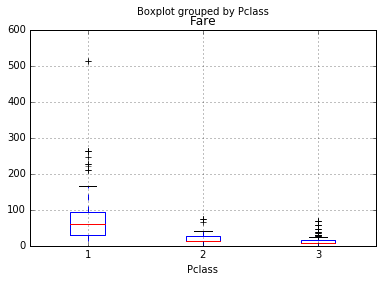

In [69]:
### 箱线图
data.boxplot(column='Fare', by = 'Pclass')    # 不同等级船舱的费用分布

(array([ 731.,  105.,   31.,    2.,   11.,    6.,    0.,    0.,    0.,    3.]),
 array([   0.     ,   51.23292,  102.46584,  153.69876,  204.93168,
         256.1646 ,  307.39752,  358.63044,  409.86336,  461.09628,
         512.3292 ]),
 <a list of 10 Patch objects>)

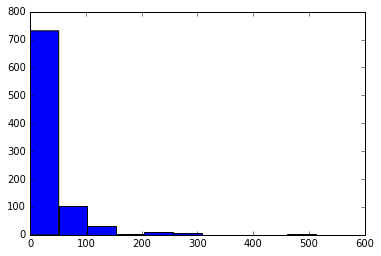

In [70]:
### 直方图
plt.hist(data['Fare'], bins = 10, range =(data['Fare'].min(),data['Fare'].max()))  # 费用分布

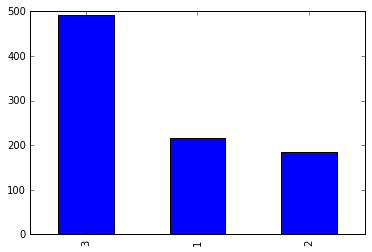

In [71]:
##分类变量也可以看分布
data.Pclass.value_counts().plot(kind='bar')

In [72]:
## 特征间关系：交叉检验
temp = pd.crosstab([data.Pclass, data.Sex], data.Survived.astype(bool))
temp

Survived       False  True 
Pclass Sex                 
1      female      3     91
       male       77     45
2      female      6     70
       male       91     17
3      female     72     72
       male      300     47

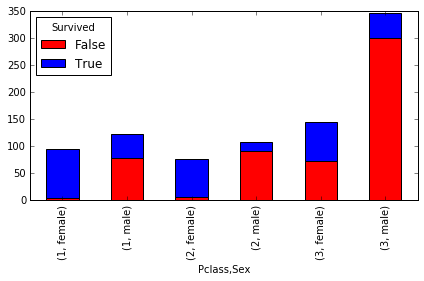

In [73]:
temp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
plt.tight_layout()

# 数据预处理

## 分类变量数值化

### 直接数值化

In [74]:
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1}).astype(int)
data['Sex'][0:6]

0    1
1    0
2    0
3    0
4    1
5    1
Name: Sex, dtype: int32

### 转为虚拟变量(Dummy Variable)

In [75]:
embarked_data = pd.get_dummies(data.Embarked)
embarked_data.head(5)

,C,Q,S,U
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [76]:
embarked_data = embarked_data.rename(columns=lambda x: 'Embarked_' + str(x))
embarked_data.head(5)

,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [77]:
data = pd.concat([data, embarked_data], axis=1)
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,NaN,NaN,S,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,NaN,C85,C,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.100,C123,S,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.050,NaN,S,0.0,0.0,1.0,0.0


## 处理缺失值

In [78]:
# 以均值代替
#mean_age = data['Age'].dropna().mean()
#data.loc[(data.Age.isnull()), 'Age'] = mean_age

In [79]:
# 根据其他变量补充：例如根据舱位等级的均价作为缺失票价
if len(data.Fare[data.Fare.isnull()]) > 0:
    fare = np.zeros(3)
    for f in range(0, 3):
        f += 1
        fare_f = data[data.Pclass == f]['Fare'].dropna().median()
        data.loc[(data.Fare.isnull()) & (data.Pclass == f), 'Fare'] = fare_f

In [80]:
# 使用随机森林预测缺失年龄
data_for_age = data[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
age_exist = data_for_age.loc[(data.Age.notnull())]  #年龄不缺失的数据
age_null = data_for_age.loc[(data.Age.isnull())]
x = age_exist.values[:, 1:]
y = age_exist.values[:, 0]
rfr = RandomForestRegressor(n_estimators=1000)
rfr.fit(x, y)
age_hat = rfr.predict(age_null.values[:, 1:])
data.loc[(data.Age.isnull()), 'Age'] = age_hat

# 存成新文档

In [81]:
data.to_csv(path + 'data_new.csv')

# 整理成自变量和因变量

In [90]:
xx = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
yy = data['Survived']
xx.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,8.050,0.0,0.0,1.0
1,1,0,38.0,1,0,59.400,1.0,0.0,0.0
2,3,0,26.0,0,0,7.925,0.0,0.0,1.0
3,1,0,35.0,1,0,53.100,0.0,0.0,1.0
4,3,1,35.0,0,0,8.050,0.0,0.0,1.0


In [91]:
x = np.array(xx)
x[0:6,:]

array([[  3.        ,   1.        ,  22.        ,   1.        ,
          0.        ,   8.05      ,   0.        ,   0.        ,   1.        ],
       [  1.        ,   0.        ,  38.        ,   1.        ,
          0.        ,  59.4       ,   1.        ,   0.        ,   0.        ],
       [  3.        ,   0.        ,  26.        ,   0.        ,
          0.        ,   7.925     ,   0.        ,   0.        ,   1.        ],
       [  1.        ,   0.        ,  35.        ,   1.        ,
          0.        ,  53.1       ,   0.        ,   0.        ,   1.        ],
       [  3.        ,   1.        ,  35.        ,   0.        ,
          0.        ,   8.05      ,   0.        ,   0.        ,   1.        ],
       [  3.        ,   1.        ,  23.86351597,   0.        ,
          0.        ,   8.4583    ,   0.        ,   1.        ,   0.        ]])

In [85]:
y = np.array(yy)
y[0:6]

array([0, 1, 1, 1, 0, 0], dtype=int64)